# 1.0 Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using Theano backend.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# 2.0 Preprocessing Data

In [2]:
# Activate to load dataset from local directory
#train_data = pd.read_csv("F:/train.csv",index_col="0")
#test_data = pd.read_csv("F:/test.csv",index_col="0")
#submissions = pd.read_csv("F:/submission.csv")
#print(submissions)

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
train_data = pd.read_csv(url, header=None, na_values=['?'])
train_data.head()
train_data[127].describe()
train_data.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
train_data.dropna(inplace=True)
train_data.shape
train_x = train_data.drop(127, axis=1)
#print(train_x)
train_y = train_data[127]
#print(train_y)

# 3.0 Splitting dataset

In [4]:
#from sklearn.cross_validation import train_test_split ## old version
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, random_state=1)

# 4.0 Building Training Models

## 4.1 Linear Model

In [5]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# examine the coefficients
print(linreg.coef_)

# make predictions
y_pred = linreg.predict(X_test)

[-3.66188167e+00  6.98124465e-01 -2.61955467e-01 -2.85270027e-01
 -1.64740837e-01  2.46972333e-01 -1.09290051e+00 -5.96857796e-01
  1.11200239e+00 -7.21968931e-01  4.27346598e+00 -2.28040268e-01
  8.04875769e-01 -2.57934732e-01 -2.63458023e-01 -1.04616958e+00
  6.07784197e-01  7.73552561e-01  5.96468029e-02  6.90215922e-01
  2.16759430e-02 -4.87802949e-01 -5.18858404e-01  1.39478815e-01
 -1.24417942e-01  3.15003821e-01 -1.52633736e-01 -9.65003927e-01
  1.17142163e+00 -3.08546690e-02 -9.29085548e-01  1.24654586e-01
  1.98104506e-01  7.30804821e-01 -1.77337294e-01  8.32927588e-02
  3.46045601e-01  5.01837338e-01  1.57062958e+00 -4.13478807e-01
  1.39350802e+00 -3.49428114e+00  7.09577818e-01 -8.32141352e-01
 -1.39984927e+00  1.02482840e+00  2.13855006e-01 -6.18937325e-01
  5.28954490e-01  7.98294890e-02  5.93688560e-02 -1.68582667e-01
  7.31264051e-01 -1.39635208e+00  2.38507704e-01  5.50621439e-01
 -5.61447867e-01  6.18989764e-01  2.55517024e+00 -3.71769599e+00
  7.09191935e-01  3.82041

### Calculate RMSE

In [6]:
# calculate RMSE
from sklearn import metrics
import numpy as np
R1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(R1)
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.2338136764948683


## 4.2 Lasso regression

In [7]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

# try alpha=0.01 and examine coefficients
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[ 0.          0.          0.00891952 -0.27423369  0.          0.
  0.         -0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.19414627  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.04335664 -0.
  0.         -0.          0.03491474 -0.         -0.06685424  0.
  0.         -0.          0.10575313  0.          0.          0.00890807
  0.         -0.1378172  -0.30954312 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.          0.05257892 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.13861081  0. 

### Calculate RSME

In [8]:
# calculate RMSE (for alpha=0.01)
y_pred = lassoreg.predict(X_test)
R2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(R2)
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.19816522542866322


## 4.3 LassoCV

In [9]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=100, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

# examine the coefficients
print(lassoregcv.coef_)

[ 0.          0.          0.         -0.28113506  0.          0.
  0.          0.          0.          0.          0.          0.
 -0.         -0.         -0.         -0.15481092  0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.          0.         -0.          0.          0.06451487  0.
  0.         -0.          0.         -0.         -0.01920421  0.
  0.         -0.          0.03386202  0.          0.          0.08901243
  0.         -0.08759757 -0.36986917 -0.         -0.         -0.
 -0.          0.          0.          0.          0.         -0.
  0.          0.          0.          0.          0.          0.
 -0.          0.          0.          0.         -0.          0.
  0.         -0.          0.          0.01740599 -0.          0.
 -0.         -0.          0.          0.          0.          0.
  0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
  0.13471036  0. 

### Calculate RSME

In [10]:
# predict method uses the best alpha value
y_pred = lassoregcv.predict(X_test)
R3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(R3)
#print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.1602095580138513


## 4.4  Neural Networks - 1 hidden layer

In [11]:
X_train = np.array(train_x)
#print(train_x)
y_train = np.array(train_y)
#print(train_y)

In [12]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_trained_samples = scaler.fit_transform(X_train).reshape(-1,1)
#print(scaled_trained_samples)

In [13]:
model = Sequential([
    Dense(16, input_shape=(122,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                1968      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,545
Trainable params: 2,545
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

In [16]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 287 samples, validate on 32 samples
Epoch 1/10
287/287 [==============================] - 0s 95us/step - loss: 0.0753 - mean_squared_error: 0.0753 - val_loss: 0.0606 - val_mean_squared_error: 0.0606
Epoch 2/10
287/287 [==============================] - 0s 94us/step - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0388 - val_mean_squared_error: 0.0388
Epoch 3/10
287/287 [==============================] - 0s 87us/step - loss: 0.0417 - mean_squared_error: 0.0417 - val_loss: 0.0268 - val_mean_squared_error: 0.0268
Epoch 4/10
287/287 [==============================] - 0s 87us/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0264 - val_mean_squared_error: 0.0264
Epoch 5/10
287/287 [==============================] - 0s 87us/step - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0237 - val_mean_squared_error: 0.0237
Epoch 6/10
287/287 [==============================] - 0s 87us/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0235 - val_mean

### Calculate RMSE

In [17]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Y1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(Y1)
#Y1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.1602095580138513
0.1602095580138513


## 4.5  Neural Networks - 2 hidden layers

In [18]:
X_train = np.array(train_x)
#print(train_x)
y_train = np.array(train_y)
#print(train_y)

In [19]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_trained_samples = scaler.fit_transform(X_train).reshape(-1,1)
#print(scaled_trained_samples)

In [20]:
model = Sequential([
    Dense(16, input_shape=(122,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                1968      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 3,601
Trainable params: 3,601
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

In [23]:
model.fit(X_train, y_train, validation_split=0.1, batch_size=10, epochs=10, shuffle=True, verbose=1)

Train on 287 samples, validate on 32 samples
Epoch 1/10
287/287 [==============================] - 0s 99us/step - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0585 - val_mean_squared_error: 0.0585
Epoch 2/10
287/287 [==============================] - 0s 91us/step - loss: 0.0555 - mean_squared_error: 0.0555 - val_loss: 0.0446 - val_mean_squared_error: 0.0446
Epoch 3/10
287/287 [==============================] - 0s 94us/step - loss: 0.0406 - mean_squared_error: 0.0406 - val_loss: 0.0332 - val_mean_squared_error: 0.0332
Epoch 4/10
287/287 [==============================] - 0s 105us/step - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0281 - val_mean_squared_error: 0.0281
Epoch 5/10
287/287 [==============================] - 0s 101us/step - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0267 - val_mean_squared_error: 0.0267
Epoch 6/10
287/287 [==============================] - 0s 94us/step - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0255 - val_me

### Calculate RMSE

In [24]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Y2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(Y2)
#Y2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.1602095580138513
0.1602095580138513


## 4.6  Neural Networks - 2 hidden layers, x2 hidden nodes

In [25]:
X_train = np.array(train_x)
#print(train_x)
y_train = np.array(train_y)
#print(train_y)

In [26]:
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_trained_samples = scaler.fit_transform(X_train).reshape(-1,1)
#print(scaled_trained_samples)

In [27]:
model = Sequential([
    Dense(16, input_shape=(122,), activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                1968      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                1088      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 7,281
Trainable params: 7,281
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(optimizer='Adam', loss='mse', metrics=['mse'])

In [30]:
Z = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
model.fit(X_train, y_train, validation_split=0.1, batch_size=len(Z), epochs=10, shuffle=True, verbose=1)

Train on 287 samples, validate on 32 samples
Epoch 1/10
287/287 [==============================] - 0s 144us/step - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.0414 - val_mean_squared_error: 0.0414
Epoch 2/10
287/287 [==============================] - 0s 105us/step - loss: 0.0336 - mean_squared_error: 0.0336 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 3/10
287/287 [==============================] - 0s 105us/step - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0306 - val_mean_squared_error: 0.0306
Epoch 4/10
287/287 [==============================] - 0s 101us/step - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0300 - val_mean_squared_error: 0.0300
Epoch 5/10
287/287 [==============================] - 0s 115us/step - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0323 - val_mean_squared_error: 0.0323
Epoch 6/10
287/287 [==============================] - 0s 108us/step - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0293 - va

### Calculate RMSE

In [31]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Y3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(Y3)
#Y3 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

0.1602095580138513
0.1602095580138513


# 5.0 ENSEMBLE MODEL

## 5.1 GradientBoostingRegressor 

In [32]:
#import numpy as np
#import pandas as pd
#from sklearn import datasets
#import matplotlib.pyplot as plt 
#from sklearn.utils import shuffle
#from sklearn import ensemble
#from sklearn.metrics import mean_squared_error
#from sklearn.preprocessing import MinMaxScaler
#from keras.metrics import categorical_crossentropy

In [33]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
train_data = pd.read_csv(url, header=None, na_values=['?'])
train_data.head()
train_data[127].describe()
train_data.drop([0, 1, 2, 3, 4], axis=1, inplace=True)
train_data.dropna(inplace=True)
train_data.shape
train_x = train_data.drop(127, axis=1)
#print(train_x)
#print(train_x.shape)
train_y = train_data[127]
#print(train_y)
#print(train_y.shape)

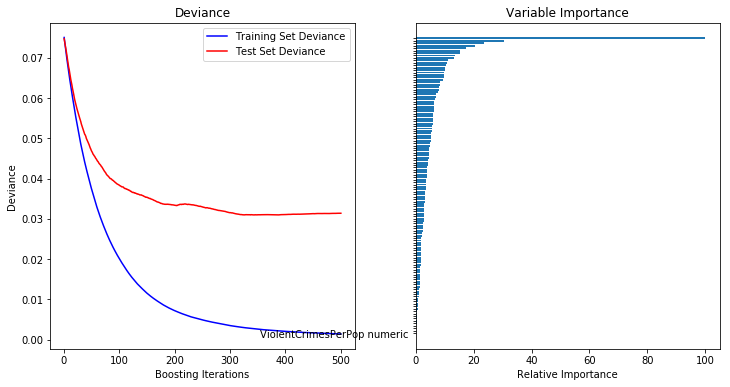

In [34]:
X, y = shuffle(train_x, train_y, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
#mse = mean_squared_error(y_test, clf.predict(X_test))
#print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, ["ViolentCrimesPerPop numeric"])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Calculate RMSE

In [35]:
np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))

0.17720173427514038

## 5.2 Ensemble of 3 NN Models (4.4, 4.5, 4.6)

In [36]:
a = [Y1, Y2, Y3]    

### Calculate RMSE

In [37]:
min(a)  

0.1602095580138513

## 5.3 Ensemble of all Models (4.1 to 4.6)

In [38]:
a = [R1, R2, R3, Y1, Y2, Y3]                          

### Calculate RMSE

In [39]:
min(a)  

0.1602095580138513